In [22]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
IMAGE_SIZE=[224,224]

In [3]:
train_path='Datasets/Train'
test_path='Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\sdasgupt\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('Datasets/Train/*')

In [7]:
len(folders)

4

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('Datasets/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 20 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8 images belonging to 4 classes.


In [16]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 1.7008 - accuracy: 0.4000 - val_loss: 2.9968 - val_accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 0.5321 - accuracy: 0.9000 - val_loss: 4.2446 - val_accuracy: 0.2500
Epoch 3/5
1/1 [==============================] - 9s 9s/step - loss: 0.0373 - accuracy: 0.9500 - val_loss: 5.3545 - val_accuracy: 0.2500
Epoch 4/5
1/1 [==============================] - 8s 8s/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 6.2839 - val_accuracy: 0.2500
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 7.0725 - val_accuracy: 0.2500


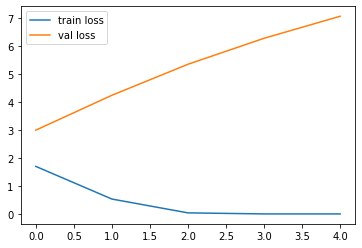

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [19]:
r.history

{'val_loss': [2.9968409538269043,
  4.2445969581604,
  5.354479789733887,
  6.2838568687438965,
  7.072474479675293],
 'val_accuracy': [0.25, 0.25, 0.25, 0.25, 0.25],
 'loss': [1.7008330821990967,
  0.5321453213691711,
  0.03731261193752289,
  1.1920928955078125e-07,
  1.1920928955078125e-07],
 'accuracy': [0.4, 0.9, 0.95, 1.0, 1.0]}

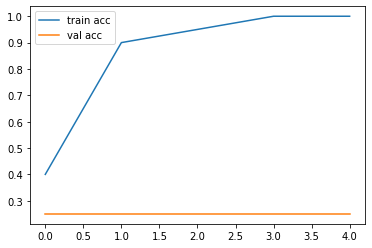

<Figure size 432x288 with 0 Axes>

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import tensorflow as tf
from keras.models import load_model
model.save('facefeatures_new_model.h5')